In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import csv
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [33]:
# import sys
# !{sys.executable} -m pip install tensorflow

In [34]:
tf.test.is_gpu_available()

False

In [35]:
directory_train = r"C:\Users\Hastansh\OneDrive\Desktop\MLExp\DogCat\training_set\training_set"
directory_test = r"C:\Users\Hastansh\OneDrive\Desktop\MLExp\DogCat\test_set\test_set"
train_dataset = keras.utils.image_dataset_from_directory(
    directory = directory_train,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

test_dataset = keras.utils.image_dataset_from_directory(
    directory = directory_test,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


class_name_test = test_dataset.class_names
class_name_train = train_dataset.class_names
class_name_train

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


['cats', 'dogs']

# Sample Images

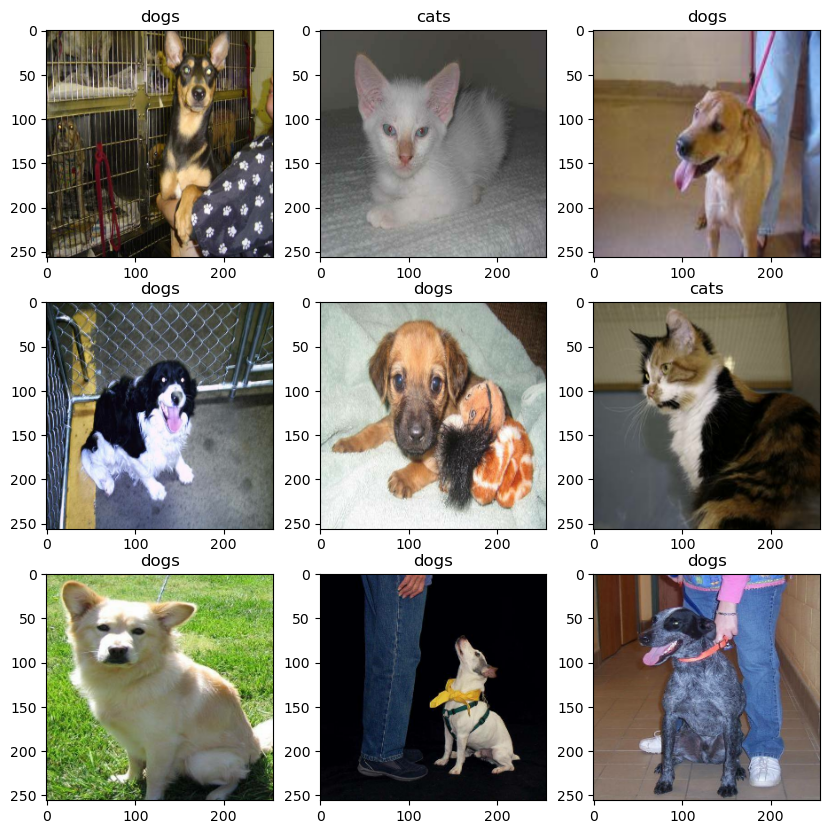

In [36]:
for images, labels in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint32"))
        plt.title(class_name_train[labels[i]])
#         plt.axis("off")

# Normalizing the dataset

In [37]:
def normalize_image(image, label):
    """Normalize images to have values between 0 and 1."""
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_dataset = train_dataset.map(normalize_image)
test_dataset = test_dataset.map(normalize_image)

In [38]:
model = Sequential([
    Conv2D(32,kernel_size=(3,3),padding='valid',activation = 'relu',input_shape=(256,256,3)),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),
    Conv2D(64,kernel_size=(3,3),padding='valid',activation = 'relu',input_shape=(256,256,3)),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),
    Conv2D(128,kernel_size=(3,3),padding='valid',activation = 'relu',input_shape=(256,256,3)),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),
    Flatten(),
    Dense(128,activation='relu'),
#      Dense(120,activation='relu'),
#      Dense(80,activation='relu'),
     Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [39]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 128)     

In [40]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
model.fit(train_dataset, epochs=10)

Epoch 1/10
251/251 [==============================] - 459s 2s/step - loss: 0.6762 - accuracy: 0.5651
Epoch 2/10
251/251 [==============================] - 445s 2s/step - loss: 0.5868 - accuracy: 0.6907
Epoch 3/10
251/251 [==============================] - 439s 2s/step - loss: 0.4873 - accuracy: 0.7630
Epoch 4/10
251/251 [==============================] - 443s 2s/step - loss: 0.3921 - accuracy: 0.8187
Epoch 5/10
 49/251 [====>.........................] - ETA: 7:06 - loss: 0.2982 - accuracy: 0.8756

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset,  verbose=2)

print('\nTest accuracy:', test_acc)